## Main Imports

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Evaluation metrics import
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, 
    confusion_matrix
)

# Models import
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

# Visualisations import
import seaborn as sns
import matplotlib.pyplot as plt

## Functions Setup for the models

In [ ]:
# Load Data
def load_data(file_path):
    return pd.read_csv(file_path, compression='gzip')

# Train Data
def train_data(data, model, label_col, test_size=0.2, random_state=42, standardize=True, with_pca=False, n_pca_components=10):
    # Split the dataset into features and labels
    X = data.drop(columns=[label_col]).values
    y = LabelEncoder().fit_transform(data[label_col].values)

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Standardize features (fit on training set, transform both train and test if necessary)
    if standardize:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Apply PCA (fit on training set, transform both train and test if necessary)
    if with_pca:
        pca = PCA(n_components=n_pca_components)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test) 

    # Train the model
    print(f"Training {model.__class__.__name__}...") 
    model.fit(X_train, y_train)

    return model, X_train, X_test, y_train, y_test


# Evaluate Model
def evaluate(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    confusion = confusion_matrix(y_test, y_pred)

    # Prepare metrics for DataFrame
    results = {
        "Metric": ["Accuracy", "Balanced Accuracy", "F1 Score", "AUC"],
        "Value": [accuracy, balanced_accuracy, f1, auc_score]
    }
    results_df = pd.DataFrame(results)
    return results_df, confusion

## Visualizations related functions

In [4]:
def plot_confusion_matrix(confusion, labels, title="Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

## Workflow with a loop (Looping through the classifiers)

### Classifiers (with standardize parameter)

In [ ]:
classifiers = {
    "LDA": {
        "model": LinearDiscriminantAnalysis(),
        "standardize": True
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "standardize": True
    },
    "QDA": {
        "model": QuadraticDiscriminantAnalysis(),
        "standardize": True
    },
    "k-NN": {
        "model": KNeighborsClassifier(n_neighbors=5),
        "standardize": True
    },
    "GBDT": {
        "model": GradientBoostingClassifier(),
        "standardize": False
    },
    "Random Forest": {
        "model": RandomForestClassifier(n_estimators=100, random_state=42),
        "standardize": False
    },
    "SVM": {
        "model": SVC(probability=True),
        "standardize": True
    }
}

### Loading the data from the path

In [ ]:
file_path = "Datasets/Data 1.csv.gz" 
label_column = "label" 

# Load the dataset
data = load_data(file_path)

### Training and Evaluation without PCA


Classifier: LDA
Training LinearDiscriminantAnalysis...
              Metric     Value
0           Accuracy  0.700457
1  Balanced Accuracy  0.700674
2           F1 Score  0.632287
3                AUC  0.738854


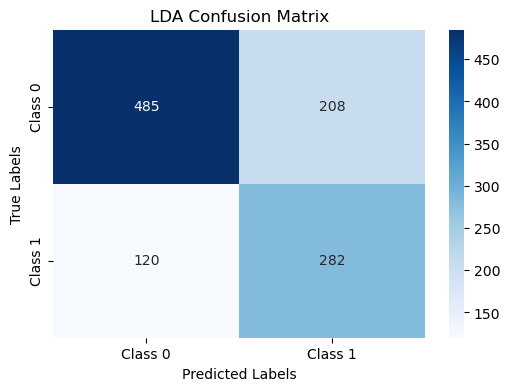


Classifier: Logistic Regression
Training LogisticRegression...
              Metric     Value
0           Accuracy  0.953425
1  Balanced Accuracy  0.950146
2           F1 Score  0.936646
3                AUC  0.991995


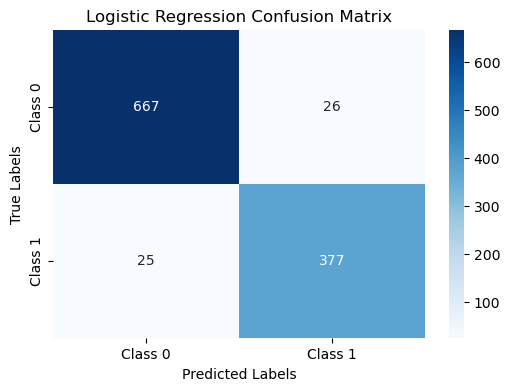


Classifier: QDA
Training QuadraticDiscriminantAnalysis...


/opt/anaconda3/envs/ST443/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              Metric     Value
0           Accuracy  0.529680
1  Balanced Accuracy  0.541206
2           F1 Score  0.477157
3                AUC  0.541206


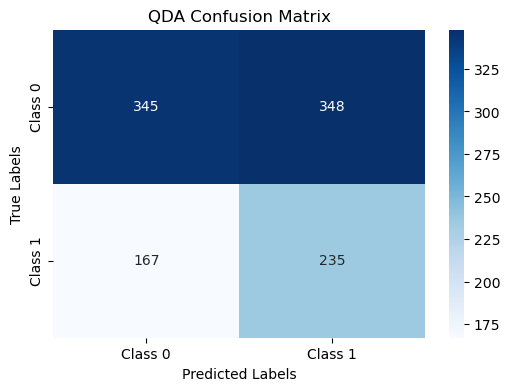


Classifier: k-NN
Training KNeighborsClassifier...
              Metric     Value
0           Accuracy  0.729680
1  Balanced Accuracy  0.666834
2           F1 Score  0.538941
3                AUC  0.714191


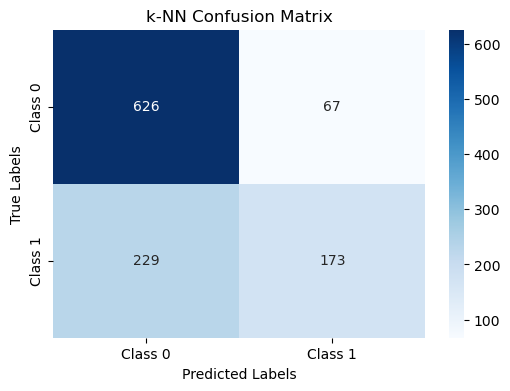


Classifier: GBDT
Training GradientBoostingClassifier...
              Metric     Value
0           Accuracy  0.948858
1  Balanced Accuracy  0.937660
2           F1 Score  0.927835
3                AUC  0.989834


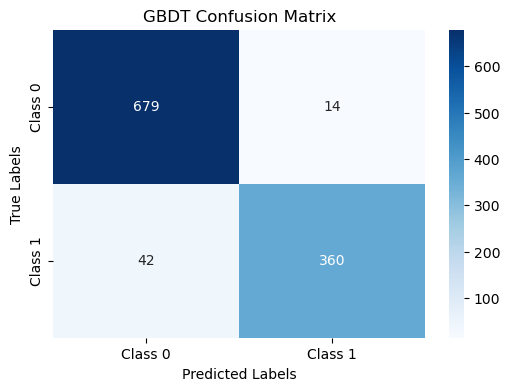


Classifier: Random Forest
Training RandomForestClassifier...
              Metric     Value
0           Accuracy  0.941553
1  Balanced Accuracy  0.923532
2           F1 Score  0.914894
3                AUC  0.989892


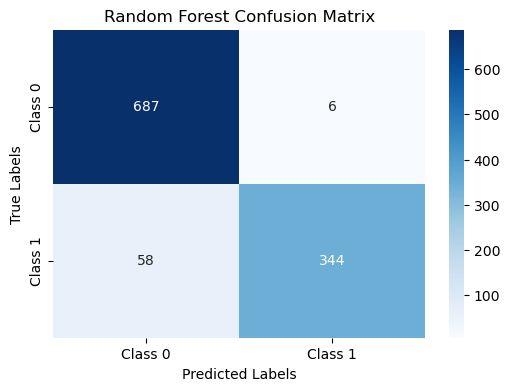


Classifier: SVM
Training SVC...
              Metric     Value
0           Accuracy  0.964384
1  Balanced Accuracy  0.953582
2           F1 Score  0.949547
3                AUC  0.992598


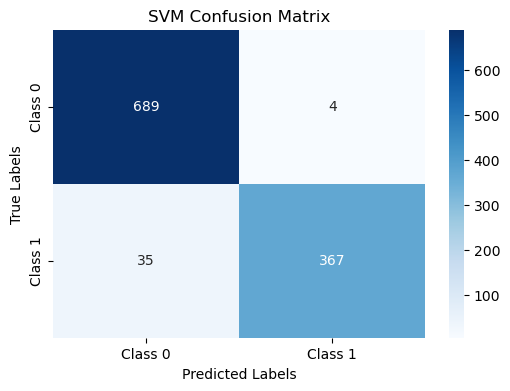

In [ ]:
for name, details in classifiers.items():
    print(f"\nClassifier: {name}")
    model, standardize = details["model"], details["standardize"]
    trained_model, X_train, X_test, y_train, y_test = train_data(
        data, model, label_col="label", standardize=standardize, with_pca=False
    )
    results_df, confusion = evaluate(trained_model, X_test, y_test)
    print(results_df)
    plot_confusion_matrix(confusion, labels=["Class 0", "Class 1"], title=f"{name} Confusion Matrix")

### Training and evaluating with PCA


Classifier: LDA
Training LinearDiscriminantAnalysis...
              Metric     Value
0           Accuracy  0.943379
1  Balanced Accuracy  0.924452
2           F1 Score  0.917112
3                AUC  0.989831


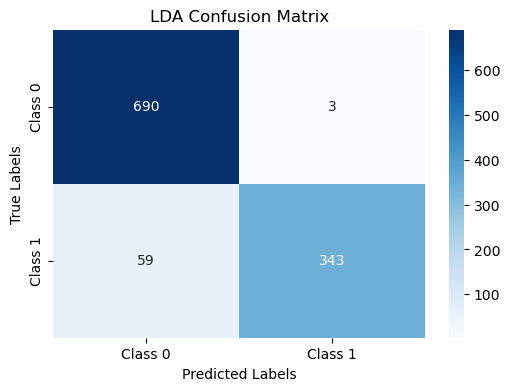


Classifier: Logistic Regression
Training LogisticRegression...
              Metric     Value
0           Accuracy  0.960731
1  Balanced Accuracy  0.954874
2           F1 Score  0.945776
3                AUC  0.991586


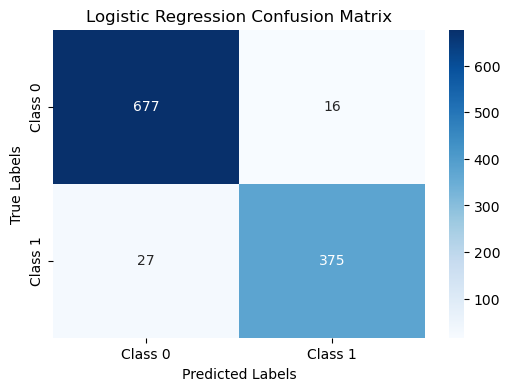


Classifier: QDA
Training QuadraticDiscriminantAnalysis...
              Metric     Value
0           Accuracy  0.953425
1  Balanced Accuracy  0.945446
2           F1 Score  0.935197
3                AUC  0.989680


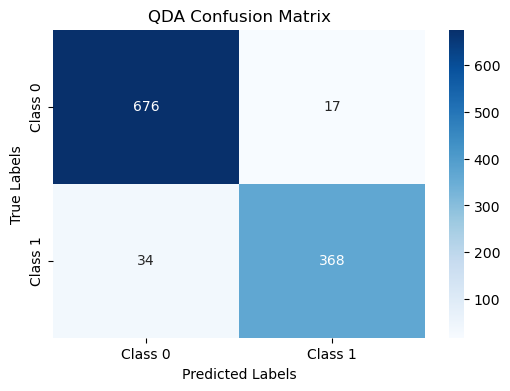


Classifier: k-NN
Training KNeighborsClassifier...
              Metric     Value
0           Accuracy  0.931507
1  Balanced Accuracy  0.914028
2           F1 Score  0.900925
3                AUC  0.971183


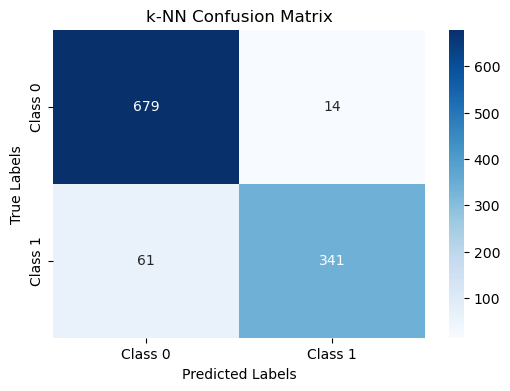


Classifier: GBDT
Training GradientBoostingClassifier...
              Metric     Value
0           Accuracy  0.939726
1  Balanced Accuracy  0.927834
2           F1 Score  0.914948
3                AUC  0.984784


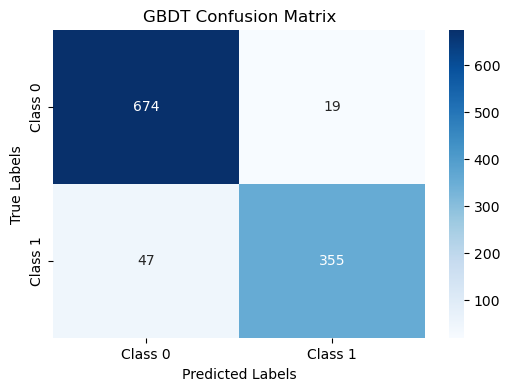


Classifier: Random Forest
Training RandomForestClassifier...
              Metric     Value
0           Accuracy  0.944292
1  Balanced Accuracy  0.933530
2           F1 Score  0.921694
3                AUC  0.982241


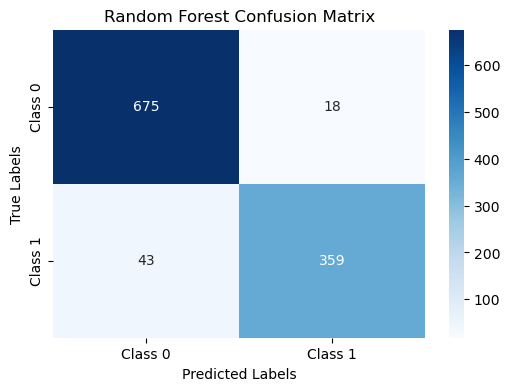


Classifier: SVM
Training SVC...
              Metric     Value
0           Accuracy  0.960731
1  Balanced Accuracy  0.952785
2           F1 Score  0.945223
3                AUC  0.992383


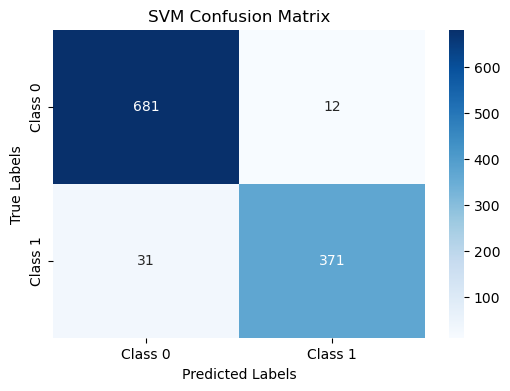

In [8]:
for name, details in classifiers.items():
    print(f"\nClassifier: {name}")
    model, standardize = details["model"], details["standardize"]
    trained_model, X_train, X_test, y_train, y_test = train_data(
        data, model, label_col="label", standardize=standardize, with_pca=True, n_pca_components=10
    )
    results_df, confusion = evaluate(trained_model, X_test, y_test)
    print(results_df)
    plot_confusion_matrix(confusion, labels=["Class 0", "Class 1"], title=f"{name} Confusion Matrix")

## Wokflow with each model seperately

In [9]:
# Resulting table of all the models' metrics for overall evaluation of the performances
results = [] 

### Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) - Without PCA:
Training LinearDiscriminantAnalysis...
              Metric     Value
0           Accuracy  0.700457
1  Balanced Accuracy  0.700674
2           F1 Score  0.632287
3                AUC  0.738854


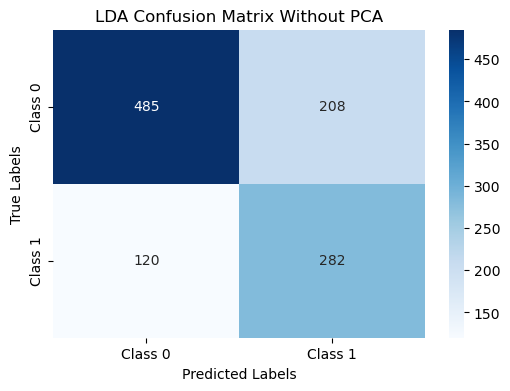

In [ ]:
# LDA without PCA
print("Linear Discriminant Analysis (LDA) - Without PCA:")
lda_model = LinearDiscriminantAnalysis()

lda_trained, X_train, X_test, y_train, y_test = train_data(
    data, lda_model, label_col=label_column, standardize=True, with_pca=False
)

lda_results_no_pca, lda_confusion_no_pca = evaluate(lda_trained, X_test, y_test)

print(lda_results_no_pca)
results.append({"Model": "LDA", "With PCA": False, **dict(zip(lda_results_no_pca["Metric"], lda_results_no_pca["Value"]))})
plot_confusion_matrix(lda_confusion_no_pca, labels=["Class 0", "Class 1"], title="LDA Confusion Matrix Without PCA")


Linear Discriminant Analysis (LDA) - With PCA:
Training LinearDiscriminantAnalysis...
              Metric     Value
0           Accuracy  0.943379
1  Balanced Accuracy  0.924452
2           F1 Score  0.917112
3                AUC  0.989824


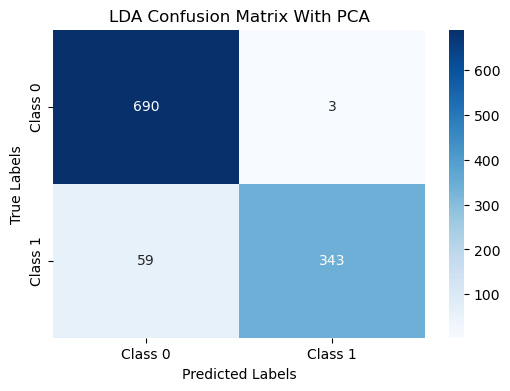

In [11]:
# LDA with PCA
print("\nLinear Discriminant Analysis (LDA) - With PCA:")
lda_trained_pca, X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_data(
    data, lda_model, label_col=label_column, standardize=True, with_pca=True, n_pca_components=10
)
lda_results_pca, lda_confusion_pca = evaluate(lda_trained_pca, X_test_pca, y_test_pca)
print(lda_results_pca)
results.append({"Model": "LDA", "With PCA": True, **dict(zip(lda_results_pca["Metric"], lda_results_pca["Value"]))})
plot_confusion_matrix(lda_confusion_pca, labels=["Class 0", "Class 1"], title="LDA Confusion Matrix With PCA")

### Logistic Classifier


Logistic Regression - Without PCA:
Training LogisticRegression...
              Metric     Value
0           Accuracy  0.953425
1  Balanced Accuracy  0.950146
2           F1 Score  0.936646
3                AUC  0.991995


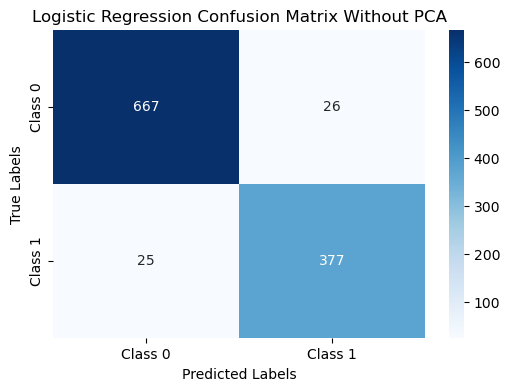

In [12]:
# Logistic Regression without PCA
print("\nLogistic Regression - Without PCA:")
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_trained, X_train, X_test, y_train, y_test = train_data(
    data, log_reg_model, label_col=label_column, standardize=True, with_pca=False
)
log_reg_results_no_pca, log_reg_confusion_no_pca = evaluate(log_reg_trained, X_test, y_test)
print(log_reg_results_no_pca)
results.append({"Model": "Logistic Regression", "With PCA": False, **dict(zip(log_reg_results_no_pca["Metric"], log_reg_results_no_pca["Value"]))})
plot_confusion_matrix(log_reg_confusion_no_pca, labels=["Class 0", "Class 1"], title="Logistic Regression Confusion Matrix Without PCA")



Logistic Regression - With PCA:
Training LogisticRegression...
              Metric     Value
0           Accuracy  0.960731
1  Balanced Accuracy  0.954874
2           F1 Score  0.945776
3                AUC  0.991593


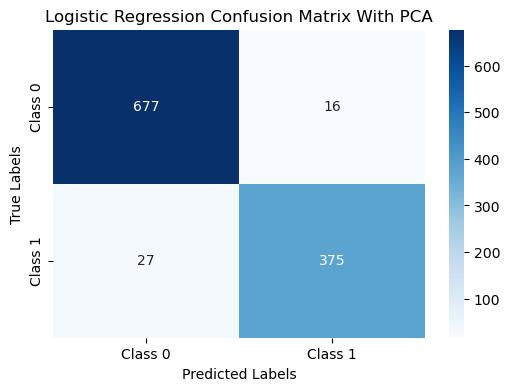

In [13]:
# Logistic Regression with PCA
print("\nLogistic Regression - With PCA:")
log_reg_trained_pca, X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_data(
    data, log_reg_model, label_col=label_column, standardize=True, with_pca=True, n_pca_components=10
)
log_reg_results_pca, log_reg_confusion_pca = evaluate(log_reg_trained_pca, X_test_pca, y_test_pca)
print(log_reg_results_pca)
results.append({"Model": "Logistic Regression", "With PCA": True, **dict(zip(log_reg_results_pca["Metric"], log_reg_results_pca["Value"]))})
plot_confusion_matrix(log_reg_confusion_pca, labels=["Class 0", "Class 1"], title="Logistic Regression Confusion Matrix With PCA")

### Quadratic Discriminant Analysis (QDA)


Quadratic Discriminant Analysis (QDA) - Without PCA:
Training QuadraticDiscriminantAnalysis...


/opt/anaconda3/envs/ST443/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              Metric     Value
0           Accuracy  0.529680
1  Balanced Accuracy  0.541206
2           F1 Score  0.477157
3                AUC  0.541206


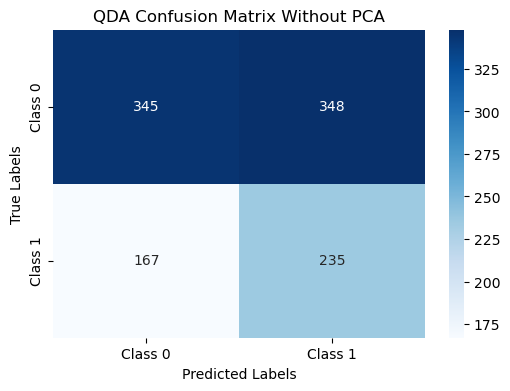

In [ ]:
# QDA without PCA
print("\nQuadratic Discriminant Analysis (QDA) - Without PCA:")
qda_model = QuadraticDiscriminantAnalysis()
qda_trained, X_train, X_test, y_train, y_test = train_data(
    data, qda_model, label_col=label_column, standardize=True, with_pca=False
)
qda_results_no_pca, qda_confusion_no_pca = evaluate(qda_trained, X_test, y_test)
# print(qda_results_no_pca)
results.append({"Model": "QDA", "With PCA": False, **dict(zip(qda_results_no_pca["Metric"], qda_results_no_pca["Value"]))})
plot_confusion_matrix(qda_confusion_no_pca, labels=["Class 0", "Class 1"], title="QDA Confusion Matrix Without PCA")


Quadratic Discriminant Analysis (QDA) - With PCA:
Training QuadraticDiscriminantAnalysis...
              Metric     Value
0           Accuracy  0.953425
1  Balanced Accuracy  0.945446
2           F1 Score  0.935197
3                AUC  0.989680


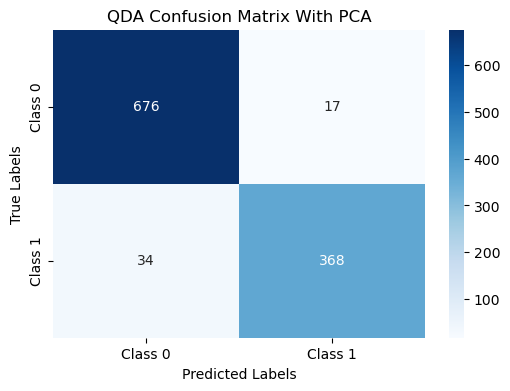

In [15]:
# QDA with PCA
print("\nQuadratic Discriminant Analysis (QDA) - With PCA:")
qda_trained_pca, X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_data(
    data, qda_model, label_col=label_column, standardize=True, with_pca=True, n_pca_components=10
)
qda_results_pca, qda_confusion_pca = evaluate(qda_trained_pca, X_test_pca, y_test_pca)
print(qda_results_pca)
results.append({"Model": "QDA", "With PCA": True, **dict(zip(qda_results_pca["Metric"], qda_results_pca["Value"]))})
plot_confusion_matrix(qda_confusion_pca, labels=["Class 0", "Class 1"], title="QDA Confusion Matrix With PCA")

### Nearest Neighbor Classifier (k-NN)


k-NN - Without PCA:
Training KNeighborsClassifier...
              Metric     Value
0           Accuracy  0.729680
1  Balanced Accuracy  0.666834
2           F1 Score  0.538941
3                AUC  0.714191


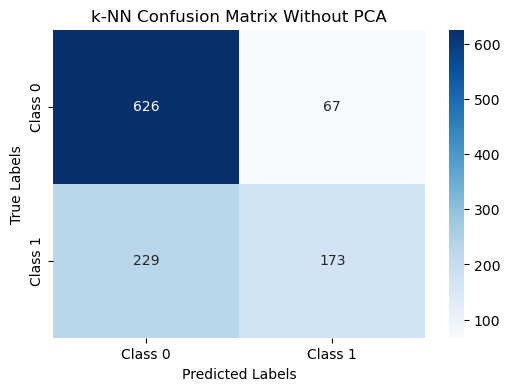

In [16]:
# k-NN without PCA
print("\nk-NN - Without PCA:")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_trained, X_train, X_test, y_train, y_test = train_data(
    data, knn_model, label_col=label_column, standardize=True, with_pca=False
)
knn_results_no_pca, knn_confusion_no_pca = evaluate(knn_trained, X_test, y_test)
print(knn_results_no_pca)
results.append({"Model": "k-NN", "With PCA": False, **dict(zip(knn_results_no_pca["Metric"], knn_results_no_pca["Value"]))})
plot_confusion_matrix(knn_confusion_no_pca, labels=["Class 0", "Class 1"], title="k-NN Confusion Matrix Without PCA")


k-NN - With PCA:
Training KNeighborsClassifier...
              Metric     Value
0           Accuracy  0.931507
1  Balanced Accuracy  0.914551
2           F1 Score  0.901186
3                AUC  0.971223


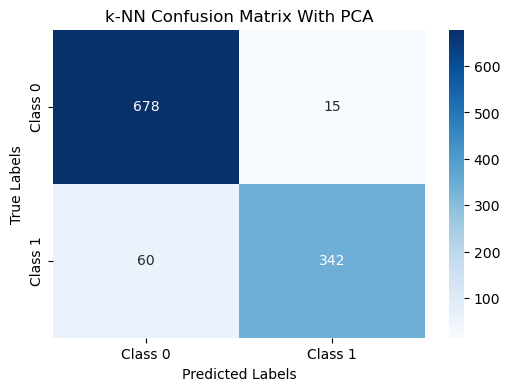

In [17]:
# k-NN with PCA
print("\nk-NN - With PCA:")
knn_trained_pca, X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_data(
    data, knn_model, label_col=label_column, standardize=True, with_pca=True, n_pca_components=10
)
knn_results_pca, knn_confusion_pca = evaluate(knn_trained_pca, X_test_pca, y_test_pca)
print(knn_results_pca)
results.append({"Model": "k-NN", "With PCA": True, **dict(zip(knn_results_pca["Metric"], knn_results_pca["Value"]))})
plot_confusion_matrix(knn_confusion_pca, labels=["Class 0", "Class 1"], title="k-NN Confusion Matrix With PCA")

### Gradient Boosting Decision Trees


Gradient Boosting Decision Trees (GBDT) - Without PCA:
Training GradientBoostingClassifier...
              Metric     Value
0           Accuracy  0.948858
1  Balanced Accuracy  0.937660
2           F1 Score  0.927835
3                AUC  0.989842


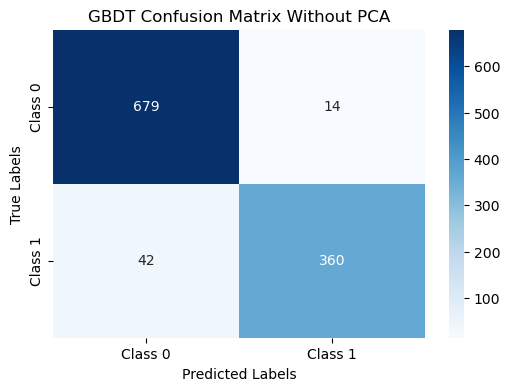

In [18]:
# GBDT without PCA
print("\nGradient Boosting Decision Trees (GBDT) - Without PCA:")
gbdt_model = GradientBoostingClassifier()
gbdt_trained, X_train, X_test, y_train, y_test = train_data(
    data, gbdt_model, label_col=label_column, standardize=False, with_pca=False
)
gbdt_results_no_pca, gbdt_confusion_no_pca = evaluate(gbdt_trained, X_test, y_test)
print(gbdt_results_no_pca)
results.append({"Model": "GBDT", "With PCA": False, **dict(zip(gbdt_results_no_pca["Metric"], gbdt_results_no_pca["Value"]))})
plot_confusion_matrix(gbdt_confusion_no_pca, labels=["Class 0", "Class 1"], title="GBDT Confusion Matrix Without PCA")


Gradient Boosting Decision Trees (GBDT) - With PCA:
Training GradientBoostingClassifier...
              Metric     Value
0           Accuracy  0.939726
1  Balanced Accuracy  0.927834
2           F1 Score  0.914948
3                AUC  0.984217


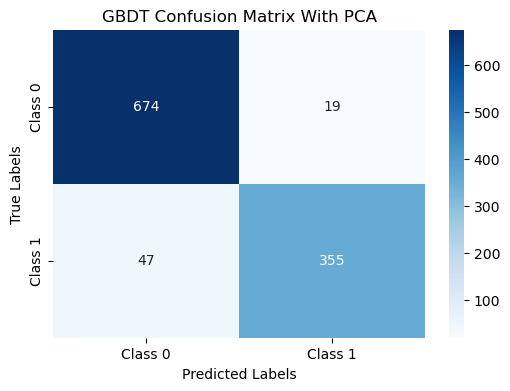

In [19]:
# GBDT with PCA
print("\nGradient Boosting Decision Trees (GBDT) - With PCA:")
gbdt_trained_pca, X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_data(
    data, gbdt_model, label_col=label_column, standardize=False, with_pca=True, n_pca_components=10
)
gbdt_results_pca, gbdt_confusion_pca = evaluate(gbdt_trained_pca, X_test_pca, y_test_pca)
print(gbdt_results_pca)
results.append({"Model": "GBDT", "With PCA": True, **dict(zip(gbdt_results_pca["Metric"], gbdt_results_pca["Value"]))})
plot_confusion_matrix(gbdt_confusion_pca, labels=["Class 0", "Class 1"], title="GBDT Confusion Matrix With PCA")

### Random Forest


Random Forest - Without PCA:
Training RandomForestClassifier...
              Metric     Value
0           Accuracy  0.941553
1  Balanced Accuracy  0.923532
2           F1 Score  0.914894
3                AUC  0.989892


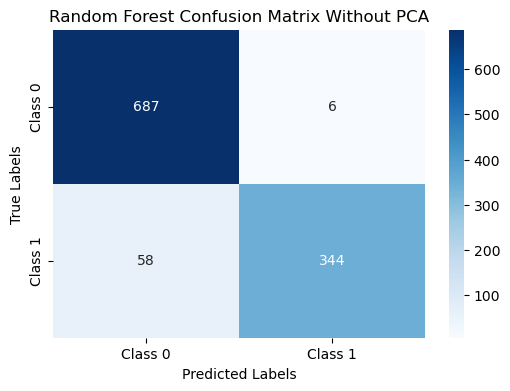

In [20]:
# Random Forest without PCA
print("\nRandom Forest - Without PCA:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_trained, X_train, X_test, y_train, y_test = train_data(
    data, rf_model, label_col=label_column, standardize=False, with_pca=False
)
rf_results_no_pca, rf_confusion_no_pca = evaluate(rf_trained, X_test, y_test)
print(rf_results_no_pca)
results.append({"Model": "Random Forest", "With PCA": False, **dict(zip(rf_results_no_pca["Metric"], rf_results_no_pca["Value"]))})
plot_confusion_matrix(rf_confusion_no_pca, labels=["Class 0", "Class 1"], title="Random Forest Confusion Matrix Without PCA")


Random Forest - With PCA:
Training RandomForestClassifier...
              Metric     Value
0           Accuracy  0.944292
1  Balanced Accuracy  0.933530
2           F1 Score  0.921694
3                AUC  0.982745


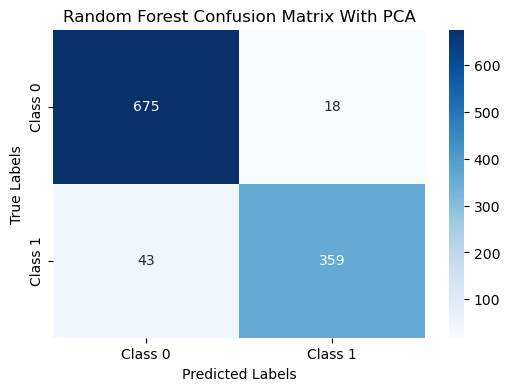

In [21]:
# Random Forest with PCA
print("\nRandom Forest - With PCA:")
rf_trained_pca, X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_data(
    data, rf_model, label_col=label_column, standardize=False, with_pca=True, n_pca_components=10
)
rf_results_pca, rf_confusion_pca = evaluate(rf_trained_pca, X_test_pca, y_test_pca)
print(rf_results_pca)
results.append({"Model": "Random Forest", "With PCA": True, **dict(zip(rf_results_pca["Metric"], rf_results_pca["Value"]))})
plot_confusion_matrix(rf_confusion_pca, labels=["Class 0", "Class 1"], title="Random Forest Confusion Matrix With PCA")

### Support Vector Machine


Support Vector Machine (SVM) - Without PCA:
Training SVC...
              Metric     Value
0           Accuracy  0.964384
1  Balanced Accuracy  0.953582
2           F1 Score  0.949547
3                AUC  0.992598


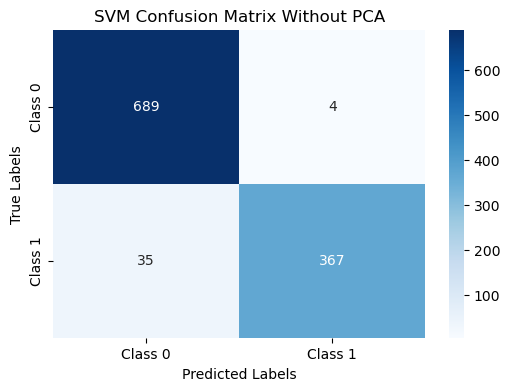

In [22]:
# SVM without PCA
print("\nSupport Vector Machine (SVM) - Without PCA:")
svm_model = SVC(probability=True)
svm_trained, X_train, X_test, y_train, y_test = train_data(
    data, svm_model, label_col=label_column, standardize=True, with_pca=False
)
svm_results_no_pca, svm_confusion_no_pca = evaluate(svm_trained, X_test, y_test)
print(svm_results_no_pca)
results.append({"Model": "SVM", "With PCA": False, **dict(zip(svm_results_no_pca["Metric"], svm_results_no_pca["Value"]))})
plot_confusion_matrix(svm_confusion_no_pca, labels=["Class 0", "Class 1"], title="SVM Confusion Matrix Without PCA")


Support Vector Machine (SVM) - With PCA:
Training SVC...
              Metric     Value
0           Accuracy  0.960731
1  Balanced Accuracy  0.952785
2           F1 Score  0.945223
3                AUC  0.992379


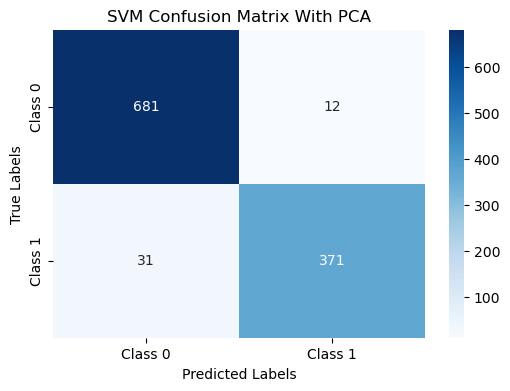

In [23]:
# SVM with PCA
print("\nSupport Vector Machine (SVM) - With PCA:")
svm_trained_pca, X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_data(
    data, svm_model, label_col=label_column, standardize=True, with_pca=True, n_pca_components=10
)
svm_results_pca, svm_confusion_pca = evaluate(svm_trained_pca, X_test_pca, y_test_pca)
print(svm_results_pca)
results.append({"Model": "SVM", "With PCA": True, **dict(zip(svm_results_pca["Metric"], svm_results_pca["Value"]))})
plot_confusion_matrix(svm_confusion_pca, labels=["Class 0", "Class 1"], title="SVM Confusion Matrix With PCA")


### Printing all the results

In [24]:
results_df = pd.DataFrame(results)
results_df

,Model,With PCA,Accuracy,Balanced Accuracy,F1 Score,AUC
0,LDA,False,0.700457,0.700674,0.632287,0.738854
1,LDA,True,0.943379,0.924452,0.917112,0.989824
2,Logistic Regression,False,0.953425,0.950146,0.936646,0.991995
3,Logistic Regression,True,0.960731,0.954874,0.945776,0.991593
4,QDA,False,0.529680,0.541206,0.477157,0.541206
5,QDA,True,0.953425,0.945446,0.935197,0.989680
6,k-NN,False,0.729680,0.666834,0.538941,0.714191
7,k-NN,True,0.931507,0.914551,0.901186,0.971223
8,GBDT,False,0.948858,0.937660,0.927835,0.989842
9,GBDT,True,0.939726,0.927834,0.914948,0.984217
